# Scraping Data Scientist Job Postings with Python and Creating Skill Wordclouds

#### Potentially useful tool for resume tweaking, optimization

Described here is a method for identifying common themes from a focused set of job listings that you might have bookmarked, after doing some basic scans via the qualifications or if the company mission seemed exciting. **note** a small investment into manual methods, mostly in Atom and Excel is required - but many boards such as linkedin disallow webscraping and few have API's that are readily approachable. I've tried both glassdoor and indeed API's and neither are a walk in the park.


The overall goal is to make wordclouds for skills by all applications, and how buzz words differ by specific job titles (data analyst, data scientist), or specific industries (tech, consumer products). Additionally, custom groups of buzzwords will be used to specifically look at the most mentioned programming languages, or algorithims desired for example.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
%matplotlib inline

<br>

if ntlk doesn't work you need to run through the following

- pip install --user -U nltk
- import nltk
- nltk.download()

<br>

---

<br>

# Manually Scraping Data

<br>

all bullet points in a particular section converted to a single string beforehand, taking the content from 3 particular sections commonly in job postings. Due to the inconsistency in titles for each section of a job post, I manually did the following 

- copied the job head and body text from Linkedin and glassdoor, 
- pasted all into a .txt
- highlighted the 3 sections descriped in Atom
- joined (Ctrl+j) the bullet points into one string 
- I then took these 2-3 strings and pasted them in excel into a single row for each company, along with the job title.

<br>

In [286]:
df = pd.read_excel("data.xlsx")

<br>

<br>

### Definitions

<br>

<br>

- **Role Info** refers to higher level descriptions and are not neccesarily always included.- where you lie within the overall company, who you collaborate with or report to, and how your specific work contributes to companies overall ambitions.

<br>

<br>
<br>


- **Responsibilties** are defined as more specific duties you could encounter on a given workday. what to expect

<br>

<br>
<br>


- **Skills** are content in found in the technical skill sections often titled 'minimum qualifications', 'what we are looking for', or 'Desired Skills'. easy to pick out if you look for the acronyms and short bullet points

<br>
<br>
<br>

In [287]:
df.head(3)

,Key,role_info,responsibilities,skills
0,Data Scientist - Product | HelloFresh,As a Data Scientist in the Global AI Tribe you...,"Explore and analyze product performance, stake...",Strong experience in a quantitative analysis r...
1,Solutions Data Scientist | ClimateAI,"We’re looking for a smart, passionate, team-or...",Integrate ClimateAi’s forecasts into customers...,Domain expertise in Climate Science Meteorolog...
2,Data Scientist | Perficient,The role of the Data Scientist is for individu...,Use your machine learning (ML) expertise to re...,5+ years of professional business and data ana...


---

<br>

## Define groupings by position / industry to further focus requirements and desired skills

<br>

In [288]:
df['Key'][:10]

0              Data Scientist - Product | HelloFresh  
1               Solutions Data Scientist | ClimateAI  
2                        Data Scientist | Perficient  
3                            Data Scientist | Tenerity
4           Natural Resource Data Scientist | Ecotrust
5            GIS Analyst | Maul Foster & Alongi Inc.  
6    Green Energy Data Scientist | Zachary Piper So...
7                            Data Scientist | adidas  
8             Spatial Data Scientist | Carbon Direct  
9    Data Scientist/Senior Data Scientist | HERE Te...
Name: Key, dtype: object

In [289]:
analyst = {}
scientist = {}

for i, each in enumerate(df["skills"]):
    title = df['Key'][i].lower().split()
    for word in title:
        if word == "scientist":
            scientist[df['Key'][i]] = each
            break

for i, each in enumerate(df["skills"]):
    title = df['Key'][i].lower().split()
    for word in title:
        if word == "analyst":  # change the string and dictionary entry below to group custom positions
            analyst[df['Key'][i]] = each
            break

In [290]:
scientist.keys()

dict_keys(['Data Scientist - Product | HelloFresh  ', 'Solutions Data Scientist | ClimateAI  ', 'Data Scientist | Perficient  ', 'Data Scientist | Tenerity', 'Natural Resource Data Scientist | Ecotrust', 'Green Energy Data Scientist | Zachary Piper Solutions  ', 'Data Scientist | adidas  ', 'Spatial Data Scientist | Carbon Direct  ', 'Data Scientist/Senior Data Scientist | HERE Technologies  ', 'Data Scientist | Ginkgo Bioworks Inc.  ', 'Data & Applied Scientist | Microsoft  ', 'Data Scientist - Geospatial & Agriculture Analytics | McKinsey & Company  ', 'Data Scientist | HubSpot  ', 'Data Scientist | SunPower Corporation  ', 'Data Scientist | Circle  ', 'Data Scientist | RTI International', 'Energy / V2X - Applied Data Scientist - V2G | General Motors', 'Associate Data Scientist | NIKE INC', 'Data Scientist | NIKE INC'])

In [291]:
analyst.keys()

dict_keys(['GIS Analyst | Maul Foster & Alongi Inc.  ', 'GIS Analyst | Vestas  '])

<br>
<br>

Unpack skills into lists by position via dictionaries, and join into single string for tokenization with nltk

<br>

In [292]:
sci_skills = ''.join(list(scientist.values()))

ana_skills = ''.join(list(analyst.values()))

print(len(sci_skills))
print(type(sci_skills))

23400
<class 'str'>


<br>
<br>

Almost 3,000 words to work with. We'll see how many remain after stopwords are filtered out here!

<br>

In [293]:
skills = sci_skills

In [294]:
tokenizer = RegexpTokenizer(r'\w+')

tokens = tokenizer.tokenize(skills.lower())

print(tokens[:5])

['strong', 'experience', 'in', 'a', 'quantitative']


In [295]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

<br>
<br>

Might make sense to add additional stopwords based on jargon common and generic to job postings, IE if some uninsightful words come to the top of the wordcloud count

<br>

In [296]:
no_stop_words = [token for token in tokens if token not in stopwords.words('english')]

print(len(tokens))
print(len(no_stop_words))

3211
2356


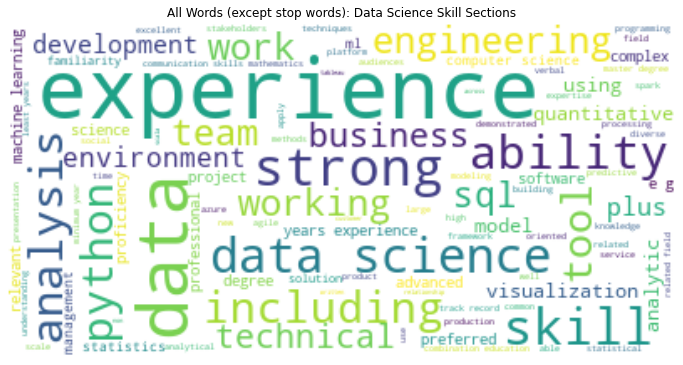

In [297]:
text = ' '.join(no_stop_words)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("All Words (except stop words): Data Science Skill Sections")
plt.show()

<br>
<br>

same as above but using a lematizer

<br>

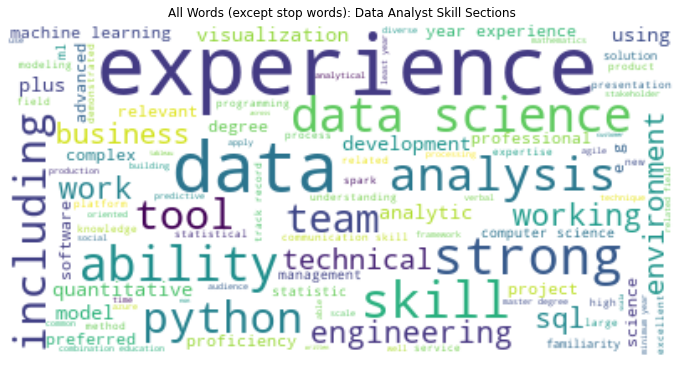

In [298]:
lemmatizer = WordNetLemmatizer()
no_stop_words_lem = [lemmatizer.lemmatize(i) for i in no_stop_words]

text_lem = ' '.join(no_stop_words_lem)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_lem)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("All Words (except stop words): Data Analyst Skill Sections")
plt.show()

what the lematizer does


In [299]:
words_changed = []
for i, each in enumerate(no_stop_words):
    lem = no_stop_words_lem[i]
    if each != lem:
        words_changed.append((each, lem))
    
set(words_changed) # de-pulicates changed words

{('abilities', 'ability'),
 ('abstractions', 'abstraction'),
 ('algorithms', 'algorithm'),
 ('amounts', 'amount'),
 ('analyses', 'analysis'),
 ('anomalies', 'anomaly'),
 ('applicants', 'applicant'),
 ('applications', 'application'),
 ('approaches', 'approach'),
 ('areas', 'area'),
 ('assumptions', 'assumption'),
 ('audiences', 'audience'),
 ('backgrounds', 'background'),
 ('candidates', 'candidate'),
 ('cases', 'case'),
 ('challenges', 'challenge'),
 ('collaborators', 'collaborator'),
 ('commitments', 'commitment'),
 ('communications', 'communication'),
 ('communities', 'community'),
 ('concepts', 'concept'),
 ('conclusions', 'conclusion'),
 ('conditions', 'condition'),
 ('consoles', 'console'),
 ('constructions', 'construction'),
 ('contributions', 'contribution'),
 ('customers', 'customer'),
 ('databases', 'database'),
 ('decisions', 'decision'),
 ('deliveries', 'delivery'),
 ('ecosystems', 'ecosystem'),
 ('environments', 'environment'),
 ('errors', 'error'),
 ('examples', 'example')

<br>
<br>


redo lematization with 'exceptions' list to avoid truncation of nouns such as 'sas' or 'gis'

<br>


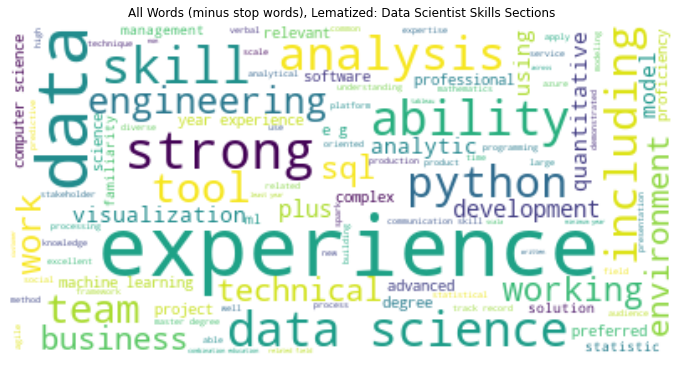

In [300]:
def lem(word):
    if word not in exceptions:
        out = lemmatizer.lemmatize(word)
    else:
        out = word
    return out

exceptions = ['sas',
              'gis',
              'pandas',
              'keras',
              'masters'
             ]

lemmatizer = WordNetLemmatizer()
no_stop_words_lem = [lem(i) for i in no_stop_words]


text_lem = ' '.join(no_stop_words_lem)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_lem)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("All Words (minus stop words), Lematized: Data Scientist Skills Sections")
plt.show()

<br>

--- 

<br>

# Filtering Out Noise

<br>

There are two options to focus your wordclouds


1.) Some generic words could be added to the stop words, if trying to get more specific like computer programming languages

2.) Rather than filterting out stopwords, create a set of keywords and filter the tokens to just that set

<br>


## Option 1

<br>

In [301]:
stop = stopwords.words('english')

In [302]:
additions = ['experience',
             'strong',
             'ability',
             'preffered',
             'technical',
             'knowledge',
             'work',
             'proficiency',
             'year',
             'business',
             'using',
             'professional',
             'working',
             'preferred',
             'skill',
             'including',
             'project',
             'familiarity',
             'analysis',
             'relevant',
             'plus',
             'excellent'
            ]

In [303]:
stop.extend(additions)

<br>
<br>

Function wrapping up the individual steps laid out in the previous section

<br>

In [304]:
def wordclouds(provided_list, plot_title):
    
    skills = provided_list

    tokenizer = RegexpTokenizer(r'\w+')

    tokens = tokenizer.tokenize(skills.lower())
    
    no_stop_words = [token for token in tokens if token not in stop]
    
    lemmatizer = WordNetLemmatizer()
    
    text = ' '.join([lem(i) for i in no_stop_words])

    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    
    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(plot_title)
    plt.show()
    return text

<br>
<br>

Using skills sections from 'Data Scientist' roles, save wordcloud data for demonstrating format

<br>

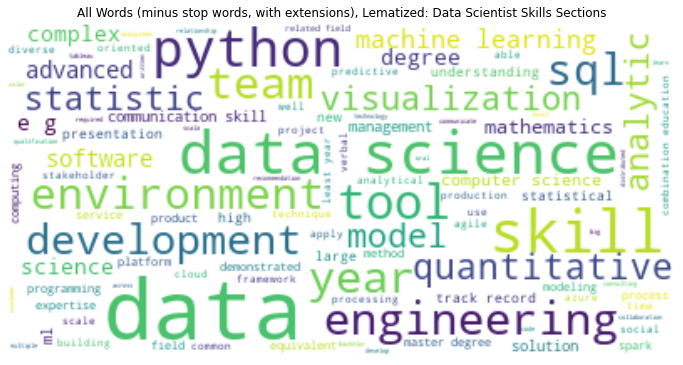

In [305]:
title = "All Words (minus stop words, with extensions), Lematized: Data Scientist Skills Sections"

ds_allwords = pd.Series(wordclouds(sci_skills, title).split(" "))

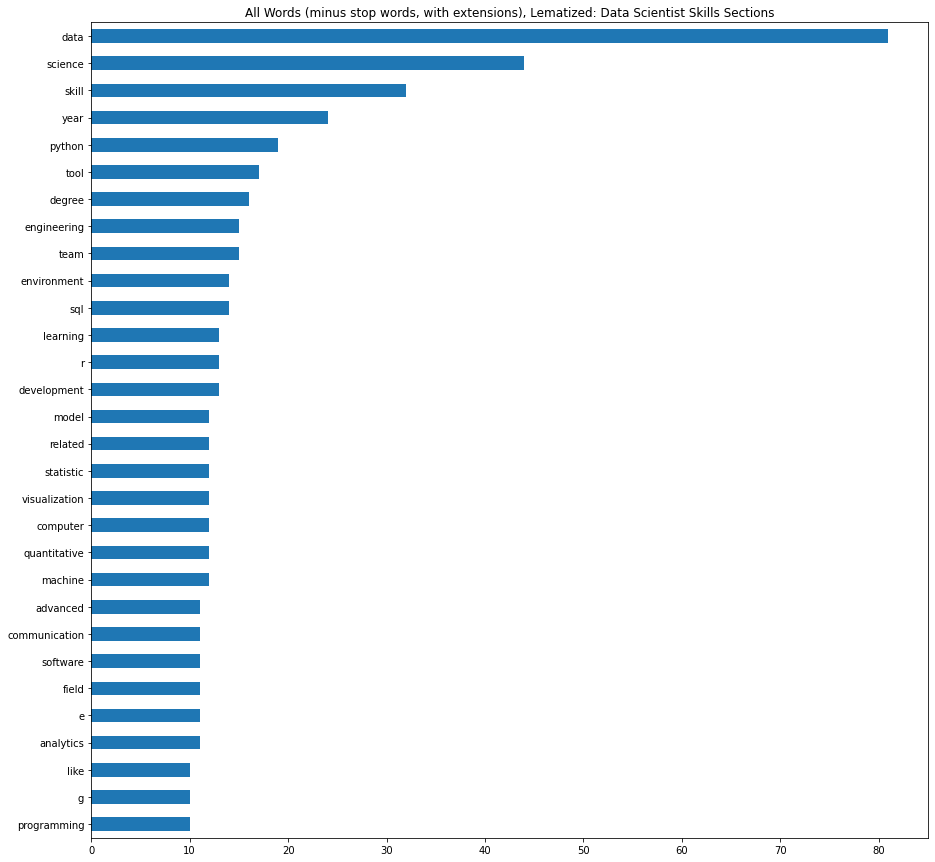

In [306]:
ds_allwords.value_counts().sort_values().tail(30).plot(kind='barh', figsize=(15,15))
plt.title("All Words (minus stop words, with extensions), Lematized: Data Scientist Skills Sections");

<br>
<br>

Now to do the same for the analyst role

<br>

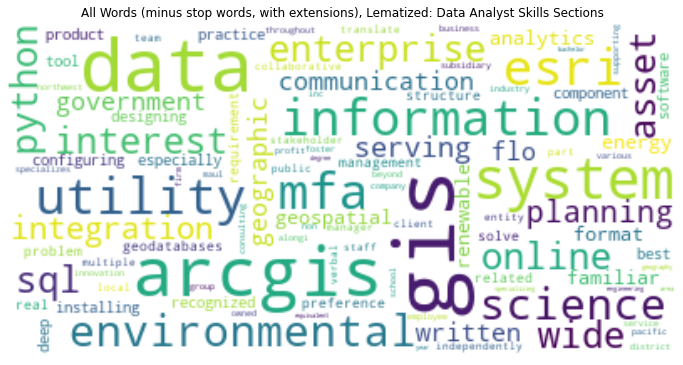

In [307]:
title = "All Words (minus stop words, with extensions), Lematized: Data Analyst Skills Sections"

ana_allwords = pd.Series(wordclouds(ana_skills, title).split(" "))

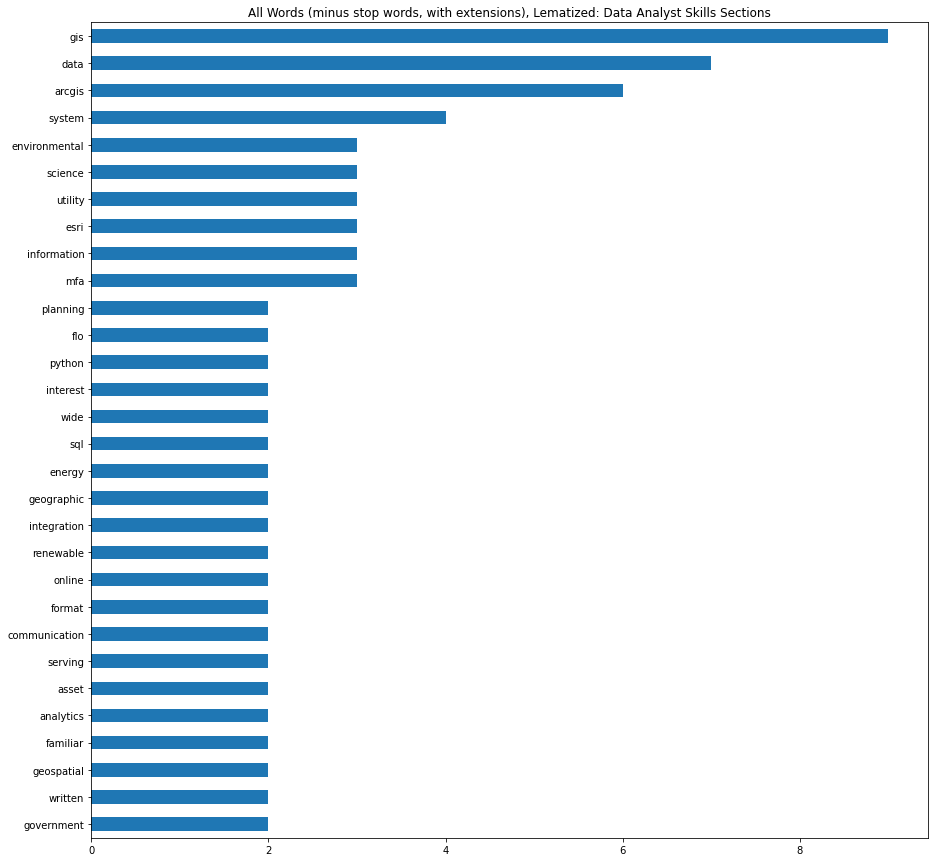

In [308]:
ana_allwords.value_counts().sort_values().tail(30).plot(kind='barh', figsize=(15,15))
plt.title("All Words (minus stop words, with extensions), Lematized: Data Analyst Skills Sections");

<br>
<br>

Comparing the two, it seems python, sql, engineering and ML are more important in data science roles. There's still alot of noise however
<br>

---

<br>

## Option 2

<br>
<br>

Since my discipline focuses on specific programming languages, data engineering or cloud platforms, and specific statistical models, I'll start off with a list of skills from my resume, and add a few extra languages or methods I have yet to learn but still popular in the field. These lists of skills will be stored as individual lists, as they can easily be concatenated, but will allow to search for example, the most popular machine learning models or most demanded GIS software

<br>

storing as a dictionary of lists might make things easier down the road

<br>

In [309]:
buzzwords = {

            'software': ['excel', 'powerpoint', 'word', 'github', 'tableau'],

            'languages': ['bash', 'sas', 'sql', 'html', 'css', 'git', 'javaScript', 'linux','c', 'c#', 'c++', 'julia'],

            'r': ['tidyverse', 'ggplot', 'stringr', 'rtools', 'regex'],

            'forcasting': ['time series', 'exponential smoothing', 'arima', 'vector autoregressive', 'var', 'prophet', 'matrix profiling'],

            'clustering': ['dbscan', 'k-means', 'pca', 'kmeans'],

            'bayes': ['bayesian inference', 'markov chain monte carlo', 'naïve bayes', 'naive bayes'],

            'gis': ['qgis', 'arcgis', 'rasterio', 'google earth engine', 'remote sensing', 'point clouds', 'leaflet'],

            'cloud': ['aws', 'gcs', 'google cloud', 'auto ml', 'cloud storage', 'azure', 'api'],

            'bigdata': ['hadoop', 'apache spark', 'hive', 'dask', 'kubernetes', 'parallel processing'],

            'models': ['classification', 'regression', 'decision trees', 'lasso', 'ridge', 'regularization', 'random forest', 'extra trees', 'k-nearest neighbor', 'knn', 'support vector machines', 'svm', 'bootstrapping', 'bagging', 'boosting', 'gridsearch', 'k-fold cross-validation', 'pipelines'],

            'ml': ['machine learning', 'deep learning', 'ai', 'artificial intelligence', 'neural networks', 'pipelines', 'rnn', 'cnn', 'computer vision', 'roboflow', 'yolo', 'mask-r-cnn'],

            'nlp': ['natural language processing', 'count and tf-idf vectorizers', 'stemming', 'lemmatization', 'tokenization', 'sentiment analysis', 'bert', 'genism', 'webscraping'],

            'python': ['pandas', 'scikit-learn', 'statsmodels', 'jupyter lab', 'nltk', 'stumpy', 'requests', 'plotly', 'beautifulsoup', 'pytorch', 'tensorflow', 'bigquery']

}

In [310]:
buzzwords.keys()

dict_keys(['software', 'languages', 'r', 'forcasting', 'clustering', 'bayes', 'gis', 'cloud', 'bigdata', 'models', 'ml', 'nlp', 'python'])

<br>
<br>


So far we've only looked at tokens, but it might be more useful to take both 
- a tokenized version of the job skill sections
- and a bigrammed version of the content

<br>

That way we can combine the two, and by using the above filtering criteria, things such as 'time series', or 'deep learning' will make it into the wordcloud

<br>

By simply removing the 'not', and changing 'stop' to 'criteria' in the previous function we can acheive option 2. Two lists will be defined in the function call, your skills list (by position, or industry) and the buzz lists, or any combination of them (words to keep)

<br>

In [311]:
def wordclouds2(provided_list, criteria, plot_title):
    skills = provided_list

    tokenizer = RegexpTokenizer(r'\w+')

    tokens = tokenizer.tokenize(skills.lower())

    buzz = [token for token in tokens if token in criteria]
    
    lemmatizer = WordNetLemmatizer()
    
    lem_buzz = ' '.join([lem(i) for i in buzz])

    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(lem_buzz)

    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(plot_title)
    plt.show()
    return lem_buzz

<br>
<br>

We'll start by using all of the buzzwords, first by creating a list of keys for use in later unpacking function

<br>


In [312]:
list(buzzwords.keys())

['software',
 'languages',
 'r',
 'forcasting',
 'clustering',
 'bayes',
 'gis',
 'cloud',
 'bigdata',
 'models',
 'ml',
 'nlp',
 'python']

In [313]:
all_keys = list(buzzwords.keys())

<br>
<br>

Since the skills by category are a single nested set of lists, a list comprehension will be needed to unpack.

The specific categories to unpack will be defined in the function call, first with 'keys' which will unpack and concatenate all the skills into a single list

<br>

In [314]:
list(buzzwords.values())[:3]

[['excel', 'powerpoint', 'word', 'github', 'tableau'],
 ['bash',
  'sas',
  'sql',
  'html',
  'css',
  'git',
  'javaScript',
  'linux',
  'c',
  'c#',
  'c++',
  'julia'],
 ['tidyverse', 'ggplot', 'stringr', 'rtools', 'regex']]

In [315]:
def target_skills(keys):
    words = []
    for each in keys:
        words += buzzwords[each]
    return words

<br>
<br>

**Single buzzword tokens for 'Data Scientist'**

<br>

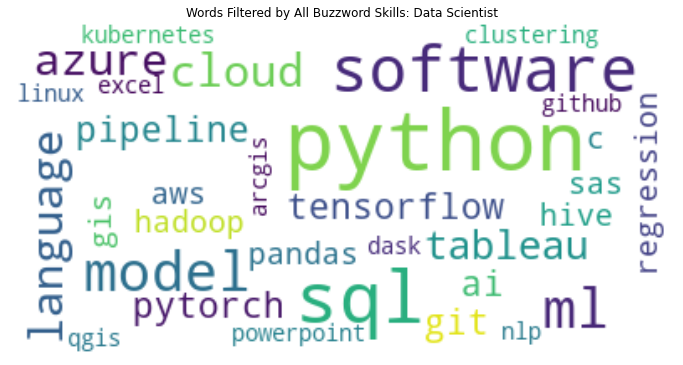

In [316]:
title = "Words Filtered by All Buzzword Skills: Data Scientist"
criteria = target_skills(all_keys) + all_keys
ds_buzz = pd.Series(wordclouds2(sci_skills, criteria, title).split(" "))

<br>
<br>

lets see the actual counts behind the wordcloud

<br>

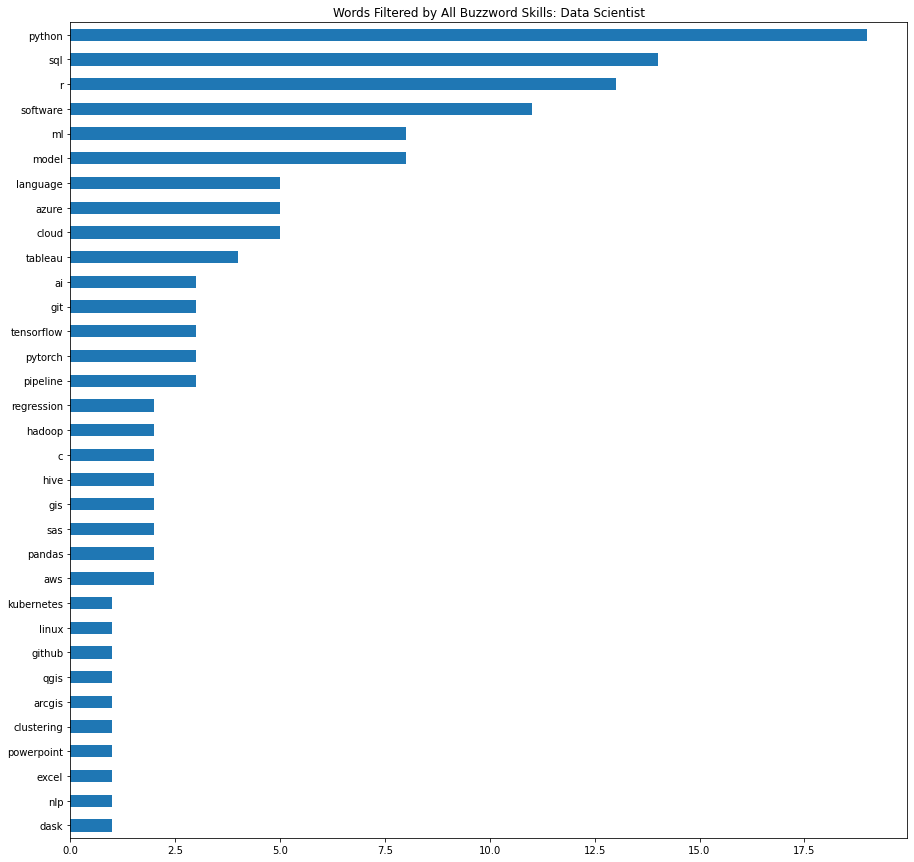

In [317]:
ds_buzz.value_counts().sort_values().plot(kind='barh', figsize=(15,15))
plt.title("Words Filtered by All Buzzword Skills: Data Scientist");

<br>
<br>

- Awesome, but notice the lack of bigrams such as 'machine learning'

- for some reason the wordclouds aren't showing 'r' even though its in the output data as shown above...

- there is a clear discrepency between the actual magnitude of counts and how differentiated they are in the wordcloud. 

<br>
<br>

**Single buzzword tokens for 'Data Analyst'**

<br>

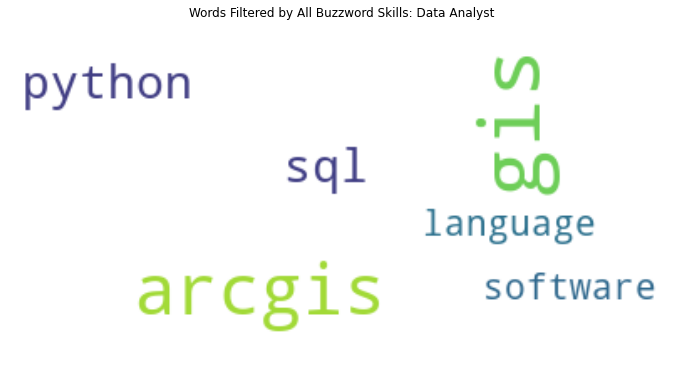

In [318]:
title = "Words Filtered by All Buzzword Skills: Data Analyst"
ana_buzz = pd.Series(wordclouds2(ana_skills, criteria, title).split(" "))

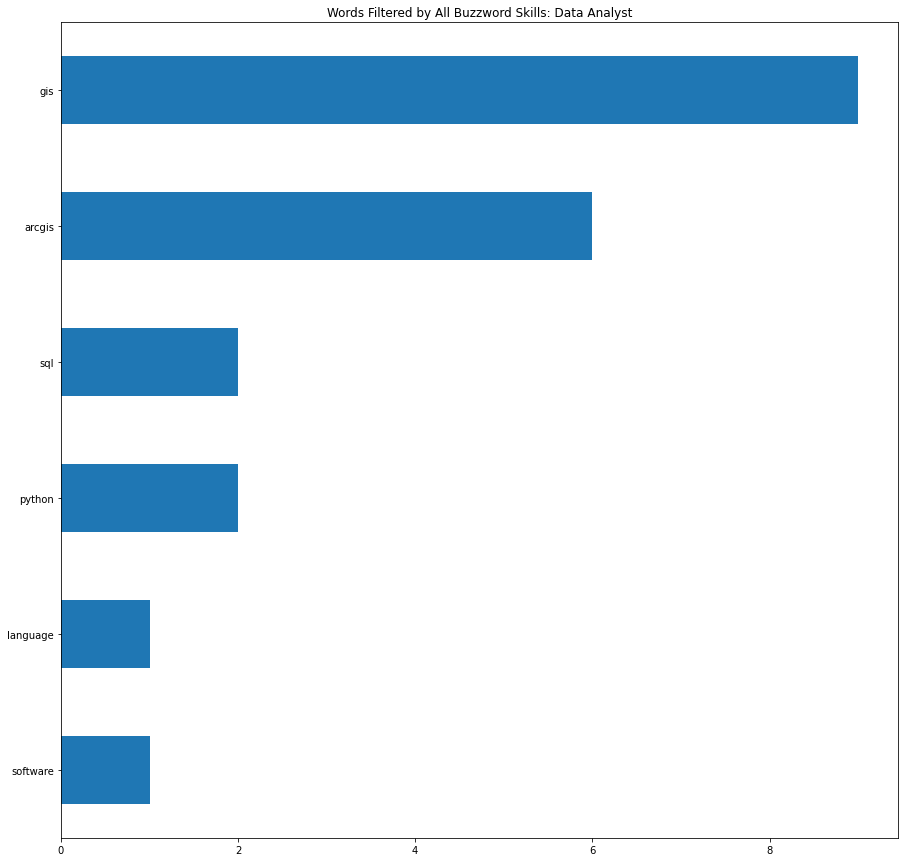

In [319]:
ana_buzz.value_counts().sort_values().plot(kind='barh', figsize=(15,15))
plt.title("Words Filtered by All Buzzword Skills: Data Analyst");

<br>
<br>

- Far less languages and platforms here for the analyst

<br>

<br>
<br>

### **Analyzing just programming languages and associated packages**

<br>

<br>
<br>

**Data Scientist**

<br>

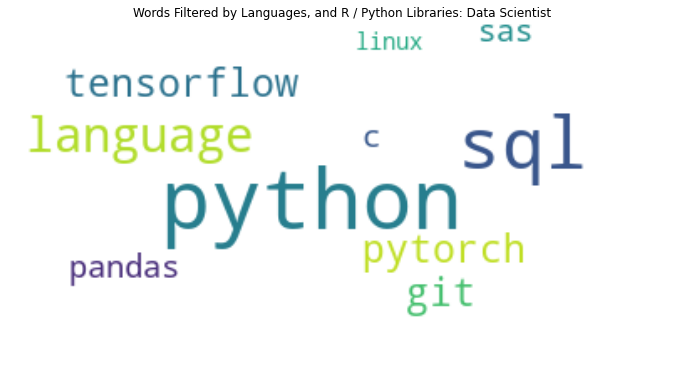

In [323]:
language_keys = ['languages', 'python', 'r']

title = "Words Filtered by Languages, and R / Python Libraries: Data Scientist"

criteria = target_skills(language_keys) + language_keys #add the category names themselves to list of buzzwords
wordclouds2(sci_skills, criteria, title);

<br>
<br>

possible candidates for wordcloud above

<br>

In [321]:
criteria

['bash',
 'sas',
 'sql',
 'html',
 'css',
 'git',
 'javaScript',
 'linux',
 'c',
 'c#',
 'c++',
 'julia',
 'pandas',
 'scikit-learn',
 'statsmodels',
 'jupyter lab',
 'nltk',
 'stumpy',
 'requests',
 'plotly',
 'beautifulsoup',
 'pytorch',
 'tensorflow',
 'bigquery',
 'tidyverse',
 'ggplot',
 'stringr',
 'rtools',
 'regex',
 'languages',
 'python',
 'r']

<br>
<br>

**Data Analyst**

<br>

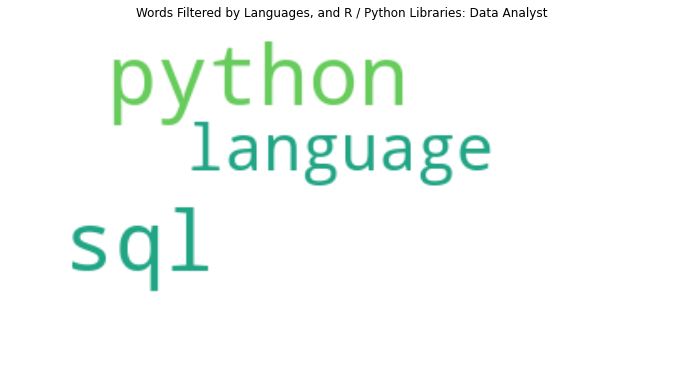

In [324]:
title = "Words Filtered by Languages, and R / Python Libraries: Data Analyst"
wordclouds2(ana_skills, criteria, title);

---
<br>

# Including Bigrams

This notebook has reached a healthy length, and most of the code was demonstrative and served as an overview for all the components of the eventual function. I'm, going to take the function, in a new notebook and start fresh with how to include bigrams as well in the filtering criteria for the word cloud

<br>
<br>

---

<br>

# Final Thoughts


<br>

**limitations**

<br>

- At the time of writing this, I only had 2 'Analyst' Roles manually scraped - as I'm applying more to data scientist roles. 

- Given a large sample size the skills for the 'analyst will drastically change, since my examples were for a 'gis analyst'. 

- I'll update the notebook with more analyst data soon.

- I can't figure out why the wordcloud package isn't displaying R, the programming language - as its in the output data from the functions and can be seen in the bar graphs.

<br>

**Conclusion**

<br>

I was able to source the job description data, go through the manual processess, and write this notebook in two nights - so even we dont have access to an API or automated text mining via webscraping and HTML tags, it's relatively painless this way. And it's easy to add job qualifications, responsibilities as single string to the spreadsheet as you go along to get more rich insights. 

<br>

As a pre-check to the wordclouds, make sure you look at sample sizes for each word. This will give insight as to whether you need more job descriptions to pull from. In this case, I used about 20 so it was a good starting point for how to customize my resume to jobs I really care about